In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, load_model, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train.shape
Y_test[0]

7

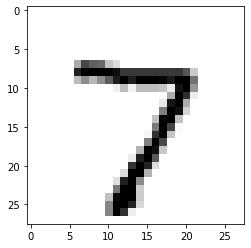

In [3]:
plt.imshow(X_test[0], cmap='binary')

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

X_train = X_train/255.0
X_test = X_test/255.0

In [6]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), padding='same', strides=1, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=36, kernel_size=(3, 3), padding='same', strides=1, activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        5220      
_________________________________________________________________
flatten_1 (Flatten)          (None, 7056)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               903296    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 910,222
Trainable params: 910,222
Non-trainable params: 0
________________________________________________

In [7]:
model.compile(
    loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']
)


In [9]:
model.fit(X_train, Y_train, batch_size=200, epochs=3, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 20s 426us/step - loss: 0.0679 - accuracy: 0.9791 - val_loss: 0.0579 - val_accuracy: 0.9826
Epoch 2/3
48000/48000 [==============================] - 21s 439us/step - loss: 0.0454 - accuracy: 0.9859 - val_loss: 0.0518 - val_accuracy: 0.9843
Epoch 3/3
48000/48000 [==============================] - 24s 503us/step - loss: 0.0342 - accuracy: 0.9894 - val_loss: 0.0517 - val_accuracy: 0.9843


In [10]:
score = model.evaluate(X_test, Y_test)
print(score)

10000/10000 [==============================] - 2s 223us/step
[0.0395273434451723, 0.9882000088691711]


In [11]:
'''
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        5220      
_________________________________________________________________
flatten_1 (Flatten)          (None, 7056)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               903296    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
=================================================================
'''
l1 = model.get_layer('conv2d_1')
#l1.get_weights()
l1.get_weights()[0].shape

(5, 5, 1, 16)

In [12]:
def plot_weight(w):
    w_min = np.min(w)
    w_max = np.max(w)
    num_grid = math.ceil(math.sqrt(w.shape[3]))
    fix, aixs = plt.subplots(num_grid, num_grid)
    for i, ax in enumerate(aixs.flat):
        if i < w.shape[3]:
            img = w[:,:,0,i]
            ax.imshow(img, vmin=w_min, vmax=w_max)
            
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

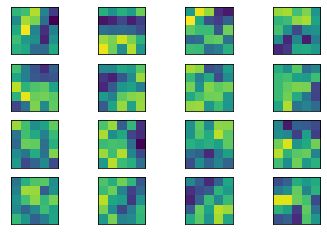

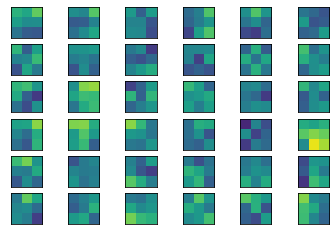

(3, 3, 16, 36)

In [13]:
l1 = model.get_layer('conv2d_1')
w1 = l1.get_weights()[0]
plot_weight(w1)

l2 = model.get_layer('conv2d_2')
w2 = l2.get_weights()[0]
plot_weight(w2)
l2.get_weights()[0].shape

In [14]:
'''
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        5220      
_________________________________________________________________
flatten_1 (Flatten)          (None, 7056)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               903296    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
=================================================================
'''
# temp_model = Model(inputs=model.get_layer('conv2d_1').input, outputs=model.get_layer('conv2d_1').output)
temp_model = Model(inputs=model.get_layer('conv2d_1').input, outputs=model.get_layer('conv2d_2').output)
output = temp_model.predict(X_test)

In [15]:
print(output.shape)

(10000, 14, 14, 36)


In [16]:
def plot_output(w):
    num_grid = math.ceil(math.sqrt(w.shape[3]))
    fix, aixs = plt.subplots(num_grid, num_grid)
    
    for i, ax in enumerate(aixs.flat):
        if i < w.shape[3]:
            img = w[0,:,:,i]
            ax.imshow(img, cmap='binary')
            
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

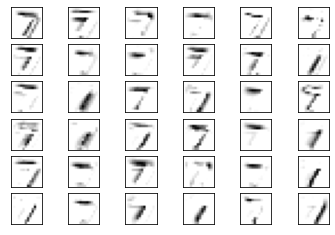

In [17]:
plot_output(output)